In [74]:
#Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine
try:
    a = float(input('Enter an integer: '))
    if a.is_integer():
        if int(a) % 2 == 0 :
            print('even')
        else:
            print('odd')    
        for i in range(int(a),int(a)+20,2):
            print(i)
    else:
        print('Please enter integer')
except ValueError:
        print('You entered an invalid number')

Enter an integer: 1
odd
1
3
5
7
9
11
13
15
17
19


x=-10 y=81
x=-3 y=4
x=-1 y=0
x=1 y=4
x=2 y=9
x=3 y=16
x=4 y=25
x=5 y=36
x=6 y=49
x=7 y=64
x=8 y=81
x=9 y=100
x=10 y=121


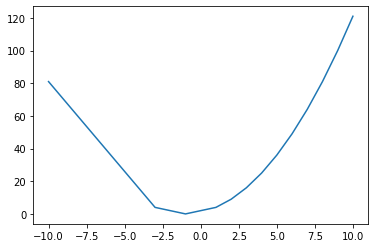

In [75]:
#Chapter 2.  Programming Challenge 2 page 55, Exploring a Quadratic Function Visually
# Enhance program to using at least 10 values for x and then creating a graph
x_values = [-10,-3,-1,1,2,3,4,5,6,7,8,9,10]  #Added -10,-3 and 6-10
y_values = []
for x in x_values:
    y = x**2 + 2*x + 1
    y_values.append(y)
    print('x={0} y={1}'.format(x, y))
from pylab import plot, show
plot(x_values,y_values)
show()

In [73]:
#Chapter 3.  Programming Challenge 2 page 89, Statistics Calculator
#Implement a stat calculator that takes a list of numbers in the file mydata.txt
#Calculate and print mean, median, mode, variance and standard deviation using the functions written earlier in chapter
def calc_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    mean = s/N
    return mean
def calc_median(numbers):
    N = len(numbers)
    numbers.sort()
    
    if N % 2 == 0:
        m1 = N/2
        m2 = (N/2) + 1
        m1 = int(m1) - 1
        m2 = int(m2) - 1
        median = (numbers[m1] + numbers[m2]) / 2
    else:
        m = (N+1)/2
        m = int(m) - 1
        median = numbers[m]
    return median
from collections import Counter
def calc_mode(numbers):
    c = Counter(numbers)
    numbers_freq = c.most_common()
    max_count = numbers_freq[0][1]
    modes = []
    for num in numbers_freq:
        if num[1] == max_count:
            modes.append(num[0])
    return modes
def find_diff(numbers):
    mean = calc_mean(numbers)
    diff = []
    for num in numbers:
        diff.append(num-mean)
    return diff
def calc_variance(numbers):
    diff = find_diff(numbers)
    squared_diff = []
    for d in diff:
        squared_diff.append(d**2)
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff / len(numbers)
    return variance

def read_data(filename):
    numbers = []
    with open(filename) as f:
        for line in f:
            numbers.append(float(line))
    return numbers
if __name__=='__main__':
    data = read_data('mydata.txt')
    m = calc_mean(data)
    median = calc_median(data)
    mode = calc_mode(data)
    variance = calc_variance(data)
    sd = calc_variance(data)**.5
    print('Mean: {0:.5f}'.format(m))
    print('Median: {0:.5f}'.format(median))
    print('Modes: ', mode[0], 'and', mode[1])
    print('Variance: {0:.5f}'.format(variance))
    print('Standard deviation: {0:.5f}'.format(sd))

Mean: 477.75000
Median: 500.00000
Modes:  100.0 and 500.0
Variance: 141047.35417
Standard deviation: 375.56272


In [79]:
#Chapter 4.  Programming Challenge 4 page 117, Solving Single-Variable Inequalities
#Create function isolve() that can take any inequality, solve it and then return the solution
from sympy import Symbol, sympify, SympifyError
from sympy import solve_poly_inequality, solve_rational_inequalities, solve_univariate_inequality, Poly
from sympy.core.relational import Relational, Equality

def isolve(ineq_obj):
    x = Symbol('x')

    expr = ineq_obj.lhs
    rel = ineq_obj.rel_op
    
    if expr.is_polynomial():
        p = Poly(expr, x)
        return solve_poly_inequality(p, rel)
    elif expr.is_rational_function():
        p1, p2 = expr.as_numer_denom()
        num  = Poly(p1)
        denom = Poly(p2)
        return solve_rational_inequalities([[((num, denom), rel)]])
    else:
        return solve_univariate_inequality(ineq_obj , x, relational=False)

if __name__ == '__main__':
    ineq = input('Enter the inequality to solve: ')
    try:
        ineq_obj = sympify(ineq)
    except SympifyError:
        print('Invalid inequality')
    else:
        if isinstance(ineq_obj, Relational) and not isinstance(ineq_obj, Equality):
            print(isolve(ineq_obj))
        else:
            print('Invalid inequality')

Enter the inequality to solve: sin(x) - .6 > 0
Interval.open(0.643501108793284, -0.643501108793284 + pi)


In [66]:
#Chapter 5.  Programming Challenge 2 page 143, Law of Large Numbers
#Verify law of Large Numbers (average value of results over multiple trials approaches the expected value as the number of trials increases)
#Write program rolling 6-sided die for the following number of trials: 100, 1000, 10000, 100000, 5000000
#Output should show Expected value, Number of Trials, Avg of Trials
import random

def roll(num_trials):
    rolls = []
    for t in range(num_trials):
        rolls.append(random.randint(1, 6))
    return sum(rolls)/num_trials

if __name__ == '__main__':
    expected_value = 3.5
    print('Expected value: {0}'.format(expected_value))
    for trial in [100, 1000, 10000, 100000, 500000]:
        avg = roll(trial)
        print('Trials: {0} Trial average {1}'.format(trial, avg))

Expected value: 3.5
Trials: 100 Trial average 3.31
Trials: 1000 Trial average 3.426
Trials: 10000 Trial average 3.5154
Trials: 100000 Trial average 3.50027
Trials: 500000 Trial average 3.502266


Enter a function in one variable: cos(x)
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: .01
x: 0.0100009999833334
Minimum value: 0.999949990416499


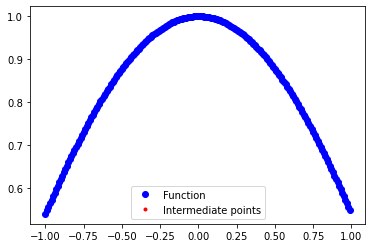

In [71]:
#Chapter 7.  Programming Challenge 2 page 205, Implement the Gradient Descent
#Gradient descent method used to find the min value of a function
#Is iterative method: starts with initial value of the variable and gradually gets closer to the variable value that corresponds to the min value
#Implement program using gradient descent algorithm to find the min value of a single-variable function specified as input by user
#Program should also create graph of function and show all intermediate values found before finding the minimum
from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
    # check if f1x=0 has a solution
    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return None
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()

    # list to store the X values traversed
    X_traversed = []
    while abs(x_old - x_new) > epsilon:
        X_traversed.append(x_new)
        x_old = x_new
        x_new = x_old-step_size*f1x.subs({x:x_old}).evalf()

    return x_new, X_traversed

def frange(start, final, interval):

    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    
    return numbers

def create_plot(X_traversed, f, var):
    # First create the graph of the function itself
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var:x}) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    # calculate the function value at each of the intermediate
    # points traversed
    f_traversed = [f.subs({var:x}) for x in X_traversed]
    plt.plot(X_traversed, f_traversed, 'r.')
    plt.legend(['Function', 'Intermediate points'], loc='best')
    plt.show()

if __name__ == '__main__':

    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({var:var_min})))
            create_plot(X_traversed, f, var)